<a href="https://colab.research.google.com/github/anneaiad/LH_CD_ANNE_PIMENTEL/blob/main/desafio_indicium_cd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Cientista de Dados - Indicium | Programa Lighthouse

Desafio

Você foi alocado em um time da Indicium contratado por um estúdio de Hollywood chamado PProductions, e agora deve fazer uma análise em cima de um banco de dados cinematográfico para orientar qual tipo de filme deve ser o próximo a ser desenvolvido. Lembre-se que há muito dinheiro envolvido, então a análise deve ser muito detalhada e levar em consideração o máximo de fatores possíveis (a introdução de dados externos é permitida - e encorajada).


# Preparação dos Dados

# Extração dos Dados

In [120]:
# Importando a biblioteca Pandas
import pandas as pd

In [121]:
# Importando o arquivo csv
dados = pd.read_csv('/content/desafio_indicium_imdb.csv')
dados.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,"When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.",84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,"The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.",90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence.,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men against Sauron's army to draw his gaze from Frodo and Sam as they approach Mount Doom with the One Ring.,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


# Tratamento e Limpeza dos Dados

In [122]:
# Verificando o tipo de cada coluna e se há algum número nulo
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [123]:
# Verificando a quantidade de valores nulos por coluna
dados.isnull().sum()

,0
Unnamed: 0,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


In [124]:
# Tratando os valores nulos
# Transformando os valores nulos da coluna 'Certificate' em 'Not Rated' para indicar que o filme não possui a nota ou não foi informada
dados['Certificate'].fillna('Not Rated', inplace=True)

/tmp/ipython-input-3395511464.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['Certificate'].fillna('Not Rated', inplace=True)


In [125]:
# Transformando os valores nulos da coluna 'Gross' em 'Unknown" para indicar números de arrecadação não conhecidos
dados['Gross'].fillna('Unknown', inplace=True)

/tmp/ipython-input-1737451260.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['Gross'].fillna('Unknown', inplace=True)


In [126]:
# Transformando os dados nulos da coluna 'Meta_score' com a mediana para conseguir trabalhar com os dados futuramente sem prejudicar a análise com números muito fora da realidade
dados['Meta_score'].fillna(dados['Meta_score'].median(), inplace=True)

/tmp/ipython-input-1643170532.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['Meta_score'].fillna(dados['Meta_score'].median(), inplace=True)


In [127]:
# Verificando se ainda há valores nulos
dados.isnull().sum()

,0
Unnamed: 0,0
Series_Title,0
Released_Year,0
Certificate,0
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,0
Director,0


In [128]:
# Removendo a coluna 'Unnamed' que possui dados irrelevantes para a análise
dados = dados.drop(columns=['Unnamed: 0'])
dados.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,"When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.",84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,"The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.",90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence.,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men against Sauron's army to draw his gaze from Frodo and Sam as they approach Mount Doom with the One Ring.,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [129]:
# Ajustando o Dtype da coluna 'Released_Year'
# Verificando todos os valores únicos para identificar irregularidades
dados['Released_Year'].unique()

array(['1972', '2008', '1974', '1957', '2003', '1994', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [130]:
# Contando quantos dados existem com o valor 'PG' na coluna Released_Year
pg_cont = (dados['Released_Year'] == 'PG').sum()
print(pg_cont)

1


In [131]:
# Verificando em qual linha está o valor 'PG'
pg_linhas = dados[dados['Released_Year'] == 'PG']
print(pg_linhas)

    Series_Title Released_Year Certificate  Runtime  \
965    Apollo 13            PG           U  140 min   

                         Genre  IMDB_Rating  \
965  Adventure, Drama, History          7.6   

                                                                                                                                                                                   Overview  \
965  NASA must devise a strategy to return Apollo 13 to Earth safely after the spacecraft undergoes massive internal damage putting the lives of the three astronauts on board in jeopardy.   

     Meta_score    Director      Star1        Star2        Star3        Star4  \
965        77.0  Ron Howard  Tom Hanks  Bill Paxton  Kevin Bacon  Gary Sinise   

     No_of_Votes        Gross  
965       269197  173,837,933  


In [132]:
# Modificando o dado e inserindo o ano correto do filme. Fonte utilizada <https://www.imdb.com/pt/title/tt0112384/>
dados.loc[dados['Released_Year'] == 'PG', 'Released_Year'] = 1995

In [133]:
# Verificando se o dado foi modificado corretamente
dados['Released_Year'].unique()

array(['1972', '2008', '1974', '1957', '2003', '1994', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 1995], dtype=object)

In [134]:
# Transformando o Dtype em int
dados['Released_Year'] = dados['Released_Year'].astype(int)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int64  
 2   Certificate    999 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     999 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          999 non-null    object 
dtypes: float64(2), int64(2), object(11)
memory usage: 117.2+ KB


In [135]:
# Criando uma nova coluna 'Runtime_min' removendo a parte textual 'min' e os espaços deixando apenas os números
dados['Runtime_min'] = dados['Runtime'].str.replace('min', '', regex=False).str.strip()

In [136]:
# Verificando se a coluna 'Runtime_min' foi criada corretamente
dados.head(3)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Runtime_min
0,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",175
1,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,"When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.",84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",152
2,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,"The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.",90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",202


In [137]:
# Modificando o tipo da coluna 'Runtime_min' para int
dados['Runtime_min'] = dados['Runtime_min'].astype(int)

In [138]:
# Verificando se o tipo da coluna 'Runtime_min' foi modificado corretamente
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int64  
 2   Certificate    999 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     999 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          999 non-null    object 
 15  Runtime_min    999 non-null    int64  
dtypes: float64(2), int64(3), object(11)
memory usage: 125.0+ KB


In [139]:
# Removendo os possíveis espaços extras nas colunas descritivas do tipo 'object'
for col in dados.select_dtypes(include=['object']).columns:
  dados[col] = dados[col].str.strip()

In [140]:
# Padronizando os textos das colunas textuais 'Genre' e 'Overview' deixando em lowercase para melhor visualização
dados_text_lower = ['Genre', 'Overview']
for col in dados_text_lower:
  dados[col] = dados[col].str.lower()

In [141]:
# Verificando se a padronização do texto foi aplicada corretamente
dados.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Runtime_min
0,The Godfather,1972,A,175 min,"crime, drama",9.2,an organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",175
1,The Dark Knight,2008,UA,152 min,"action, crime, drama",9.0,"when the menace known as the joker wreaks havoc and chaos on the people of gotham, batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.",84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",152
2,The Godfather: Part II,1974,A,202 min,"crime, drama",9.0,"the early life and career of vito corleone in 1920s new york city is portrayed, while his son, michael, expands and tightens his grip on the family crime syndicate.",90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",202
3,12 Angry Men,1957,U,96 min,"crime, drama",9.0,a jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence.,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000",96
4,The Lord of the Rings: The Return of the King,2003,U,201 min,"action, adventure, drama",8.9,gandalf and aragorn lead the world of men against sauron's army to draw his gaze from frodo and sam as they approach mount doom with the one ring.,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905",201


In [142]:
# Salvando os dados tratados em uma cópia do dataframe original
dados_tratados = dados.copy()

In [143]:
# Removendo a coluna 'Runtime' para utilizar apenas a nova coluna criada 'Runtime_min'
dados_tratados.drop(columns=['Runtime'], inplace=True)

In [144]:
# Verificando se foi aplicado corretamente
dados_tratados.head(3)

,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Runtime_min
0,The Godfather,1972,A,"crime, drama",9.2,an organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",175
1,The Dark Knight,2008,UA,"action, crime, drama",9.0,"when the menace known as the joker wreaks havoc and chaos on the people of gotham, batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.",84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",152
2,The Godfather: Part II,1974,A,"crime, drama",9.0,"the early life and career of vito corleone in 1920s new york city is portrayed, while his son, michael, expands and tightens his grip on the family crime syndicate.",90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",202


In [145]:
# Salvando os dados tratados em um novo arquivo csv para futura consultas
dados_tratados.to_csv('dados_tratados_desafio_indicium.csv', index=False)

# Análise e Visualização dos Dados

A seguir estaremos respondendo as seguintes perguntas:

a) Qual filme você recomendaria para uma pessoa que você não conhece?

b) Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

c) Quais insights podem ser tirados com a coluna overview? É possível inferir o gênero do filme a partir dessa coluna?

# Primeiras Análises

In [146]:
# Primeira visualização dos números utilizando o describe
dados_tratados.describe()

,Released_Year,IMDB_Rating,Meta_score,No_of_Votes,Runtime_min
count,999.000000,999.000000,999.000000,9.990000e+02,999.000000
mean,1991.218218,7.947948,78.131131,2.716214e+05,122.871872
std,23.297166,0.272290,11.373766,3.209126e+05,28.101227
min,1920.000000,7.600000,28.000000,2.508800e+04,45.000000
25%,1976.000000,7.700000,72.000000,5.547150e+04,103.000000
50%,1999.000000,7.900000,79.000000,1.383560e+05,119.000000
75%,2009.000000,8.100000,85.500000,3.731675e+05,137.000000
max,2020.000000,9.200000,100.000000,2.303232e+06,321.000000


É possível observar que o filme mais antigo em que temos registro no nosso dataFrame é de 1920 e o mais recente 2020.

A Nota mais alta do IMDB é de 9.2 e a mais baixa de 7.6 e com uma média de 7.9.

A Nota do Meta Score mais alta é de 100 e a mais baixa é de 28, o desvio padrão é de 11.37 indicando uma alta variação ou possível presença de outliers.

O menor número de votos é de 25mil e o maior 2M, aproximadamente, com uma média de 270mil o que pode indicar uma grande variação e possível presença de outliers como filmes super populares puxando a média pra cima.

O filme mais longo tem uma duração de 321min ou seja aproximadamente 5h35min, o que não é comum em um filme, indicando um possível outlier ou dados incorretos. O filme mais curto é de 42min, o que pode ser comum em filmes mais antigos.

In [147]:
# Importando as bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
# Verificando as correlações entre as variáveis
dados_num = dados_tratados.select_dtypes(include=['int64', 'float64'])
matriz_dados_corr = dados_num.corr()

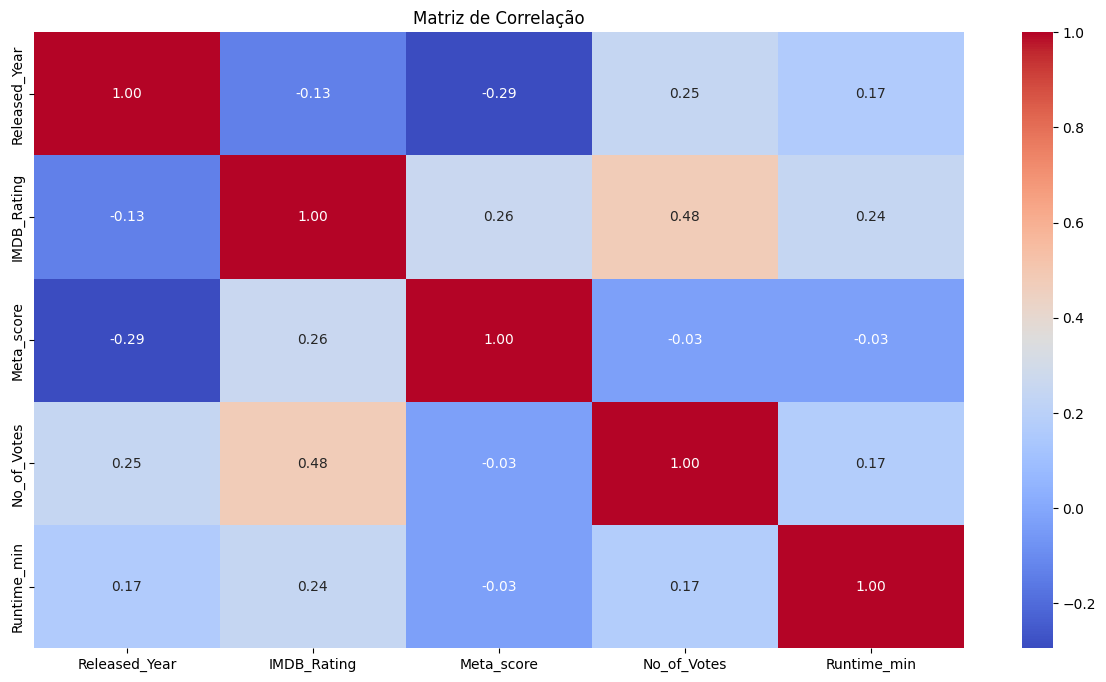

In [149]:
# Criando um gráfico heatmap para visualização da matriz de correlação
plt.figure(figsize=(15,8))
sns.heatmap(matriz_dados_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

Considerando os seguintes parâmetros para os coeficientes:

0.0 a 0.3 ➡ fraca

0.3 a 0.7 ➡ moderada

0.7 a 1.0 ➡ forte


Conseguimos visualizar pelo mapa de calor que a variável 'Número de Votos' tem uma correlação considerável com a 'Arrecadação' de coeficiente 0.59 e com a 'Nota IMDB' de coeficiente 0.48.

A 'Nota IMDB' tem correlações maiores com as variáveis 'Número de Votos', 'Tempo de Duração' e 'Meta Score'.

Podemos notar também que o 'Ano de Lançamento' tem uma correlação inversamente proporcional em relação as variáveis 'Nota IMDB' e 'Meta Score'.

O valor de 'Arrecadação' tem correlação maior com o 'Número de Votos' e 'Ano de Lançamento'



# Qual filme você recomendaria para uma pessoa que você não conhece?

In [226]:
# Verificar os filmes mais populares em relação a pontuação IMDB e Meta Score calculando a média de pontuação
# Criando uma nova coluna com a média das notas IMDB e Meta
dados_tratados['Nota_Media'] = ((dados_tratados['IMDB_Rating'] * 10) + dados_tratados['Meta_score'])/2
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Series_Title   999 non-null    object  
 1   Released_Year  999 non-null    int64   
 2   Certificate    999 non-null    object  
 3   Genre          999 non-null    object  
 4   IMDB_Rating    999 non-null    float64 
 5   Overview       999 non-null    object  
 6   Meta_score     999 non-null    float64 
 7   Director       999 non-null    object  
 8   Star1          999 non-null    object  
 9   Star2          999 non-null    object  
 10  Star3          999 non-null    object  
 11  Star4          999 non-null    object  
 12  No_of_Votes    999 non-null    int64   
 13  Gross          830 non-null    float64 
 14  Runtime_min    999 non-null    int64   
 15  Nota_Media     999 non-null    float64 
 16  Genre_split    999 non-null    object  
 17  Gross_group    830 non-null    cate

In [227]:
# Verificando alguns dados estatísticos da 'Nota Média' que acabamos de criar para saber qual a média de notas dos filmes, além da nota média mais alta e a mais baixa
dados_tratados['Nota_Media'].describe()

,Nota_Media
count,999.000000
mean,78.805305
std,6.183515
min,52.500000
25%,75.500000
50%,79.500000
75%,82.500000
max,96.000000


Podemos observar que a nota média dos filmes é de 78.8.

A maior nota média é de 96.0 e a menor é de 52.5.

Podemos observar também que pelo menos 75% dos filmes tem uma nota média abaixo de 82.2 e 50% dos filmes tem uma nota de 79.5 o que se aproxima muito da média.

25% dos filmes tem uma nota abaixo de 75.5.

Tanto a nota mais alta de 96.0 quanto a nota mais baixa de 52.5 estão bem distantes da média, indicando possível presença de outliers.

In [225]:
# Selecionando os top 20 melhores avaliados segundo a 'Nota Média' calculada
top_20_nota_media = dados_tratados.sort_values(by='Nota_Media', ascending=False).head(20)
print(top_20_nota_media[['Series_Title', 'Nota_Media']].to_string())

                                                             Series_Title  Nota_Media
0                                                           The Godfather        96.0
3                                                            12 Angry Men        93.0
49                                                             Casablanca        92.5
80                                                            Rear Window        92.0
51                                                            City Lights        92.0
30                                                   Shichinin no samurai        92.0
5                                                            Pulp Fiction        91.5
4                           The Lord of the Rings: The Return of the King        91.5
6                                                        Schindler's List        91.5
118                                                               Vertigo        91.5
123                                                   

Se utilizarmos apenas a Nota Média de avaliação de cada filme, podemos listar e recomendar estes filmes acima como os mais recomendados. Porém, podemos analisar outros fatores de popularidade como o 'Genero' para que nossa lista de recomendação seja mais assertiva.



In [152]:
# Separar a coluna 'Genre' em listas para auxiliar na contagem dos gêneros
dados_tratados['Genre_split'] = dados_tratados['Genre'].str.split(', ')

In [153]:
# Explodir as listas para criar novas linhas com valor único
dados_genero = dados_tratados.explode('Genre_split')

In [154]:
# Limpando os espaços para garantir valores únicos
dados_genero['Genre_split'] = dados_genero['Genre_split'].fillna('').astype(str).str.strip()

In [155]:
# Contagem de gênero
genero_contagem = dados_genero['Genre_split'].value_counts()
print(genero_contagem)

Genre_split
drama        723
comedy       233
crime        209
adventure    196
action       189
thriller     137
romance      125
biography    109
mystery       99
animation     82
sci-fi        67
fantasy       66
history       56
family        56
war           51
music         35
horror        32
western       20
film-noir     19
sport         19
musical       17
Name: count, dtype: int64


Podemos verificar que o genero 'drama' é o que aparece com mais frequencia, seguido de 'comedy' e 'crime'.

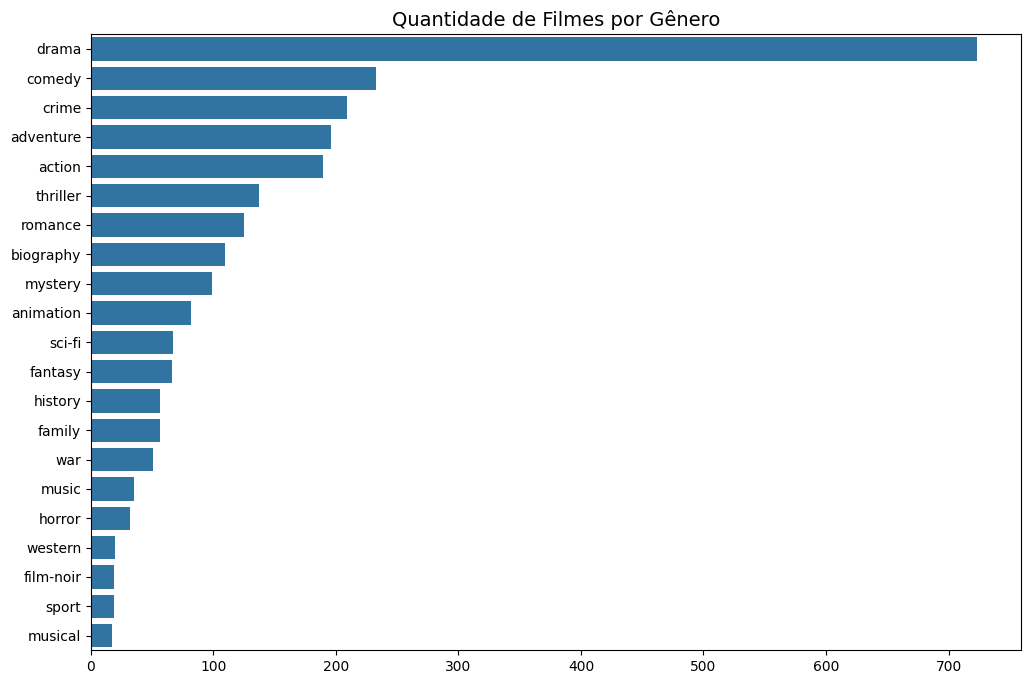

In [230]:
# Criando um gráfico de barras para representar a quantidade de filmes por gênero
plt.figure(figsize=(12,8))
sns.barplot(y=genero_contagem.index, x=genero_contagem.values)
plt.title('Quantidade de Filmes por Gênero', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.show()



No gráfico de barras acima é possível visualizar com clareza que o gênero 'drama' é o mais popular, aparecendo com muito mais frequencia que os outros gêneros. O gênero 'comedy' apesar de ser o segundo da lista ainda tem menos da metade de aparições que o genero 'drama'.

In [157]:
# Verificando a nota média de cada gênero
top_genero_media = dados_genero.groupby('Genre_split')['Nota_Media'].mean().sort_values(ascending=False)
print(top_genero_media)

Genre_split
film-noir    83.710526
western      81.550000
war          80.137255
animation    80.109756
romance      80.076000
horror       80.015625
history      79.366071
mystery      79.242424
drama        78.888658
musical      78.852941
adventure    78.803571
comedy       78.596567
family       78.562500
sci-fi       78.276119
music        78.200000
thriller     78.149635
fantasy      77.992424
biography    77.986239
crime        77.822967
action       77.084656
sport        76.236842
Name: Nota_Media, dtype: float64


Apesar do gênero 'drama' ser o mais popular em relação a frequência de vezes que ele aparece, ele não aparece em primeiro na lsita das melhores notas médias.

O gênero melhor avaliado seria o 'film-noir' com nota média de 83.71.

E o gênero com pior avaliação é o 'sport' com nota média de 76.23.

'Drama' segue com a pontuação media de 78.88 em 9º lugar no ranking de pontuação média.

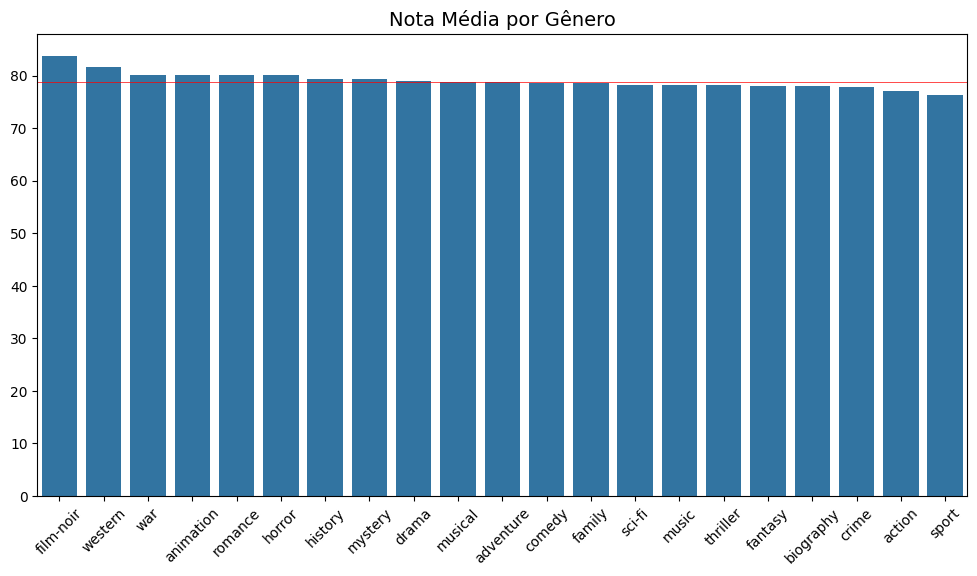

In [231]:
# Visualizando as notas média por gênero em um gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x=top_genero_media.index, y=top_genero_media.values)
nota = 78.8
plt.axhline(y=nota, color='red', linewidth=0.5)
plt.title('Nota Média por Gênero', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('')
plt.show()


No gráfico acima podemos observar que os gêneros 'film-noir', 'western', 'war', 'animation', 'romance', 'horror', 'history' e 'mystery' estão acima da média de 78.8.

O gênero 'drama' fica muito próximo da linha da média, ele não se destaca em relação aos outros.

Assim, o gênero 'drama' apesar de aparecer com mais frequência, não é o fator decisivo para uma nota média mais alta.

In [159]:
# Média de ano de lançamento por gênero
top_lancamento_media = dados_genero.groupby('Genre_split')['Released_Year'].mean().sort_values(ascending=False)
print(top_lancamento_media)

Genre_split
animation    2002.219512
sport        2001.736842
biography    1998.577982
action       1997.719577
music        1996.657143
adventure    1995.056122
drama        1992.182573
sci-fi       1992.164179
crime        1991.913876
fantasy      1991.287879
comedy       1991.034335
thriller     1990.963504
family       1988.625000
history      1988.500000
mystery      1987.737374
romance      1987.400000
musical      1979.294118
war          1979.196078
horror       1969.531250
western      1969.450000
film-noir    1948.578947
Name: Released_Year, dtype: float64


A partir das médias de Ano de Lançamento podemos observar que o gênero 'animação' tem a tendência de ter o ano de lançamento mais recente, o que pode indicar uma tendência do mercado.

Em contrapartida, o gênero film-noir, que verificamos ser o gênero melhor avaliado de acordo com sua nota média, tem a tendência a ter o ano de lançamento mais antigo, o que pode indicar uma queda de tendências no mercado, mostrando que esses gêneros podem não ser tão populares atualmente.

In [248]:
# Selecionar os filmes por ano de lançamento e nota média
melhores_filmes_recentes = (dados_tratados[dados_tratados['Nota_Media'] > 78.8][['Series_Title', 'Released_Year', 'Nota_Media','Genre']].sort_values(
    by=['Released_Year', 'Nota_Media'], ascending=[False, False]))
print(melhores_filmes_recentes.head(20).to_string())

                          Series_Title  Released_Year  Nota_Media                         Genre
17                            Hamilton           2020        88.0     biography, drama, history
19                     Soorarai Pottru           2020        82.5                         drama
204                               Soul           2020        82.0  animation, adventure, comedy
612                               Druk           2020        79.5                 comedy, drama
463                        Dil Bechara           2020        79.0        comedy, drama, romance
18                        Gisaengchung           2019        91.0       comedy, drama, thriller
194  Portrait de la jeune fille en feu           2019        88.0                drama, romance
465                     Marriage Story           2019        86.5        comedy, drama, romance
483                       The Irishman           2019        86.5       biography, crime, drama
584                       Little Women  

Os filmes que eu indicaria, considerando os lançamentos mais recentes e com pontuação acima da média de 78.8, seriam estes acima.

Com destaque para o filme 'Hamilton' sendo o mais recente e com pontuação acima da média com 88.0 e o filme 'Gisaenchung' com a pontuação mais alta entre os mais recentes com 91.0.

Podemos observar também que a maioria possui 'drama' em sua lista de gênero, que é o mais popular, mas não decisivo na nota média do filme.

In [251]:
# Selecionar os filmes por ano de lançamento e nota média
melhores_filmes_recentes = (dados_tratados[dados_tratados['Nota_Media'] > 78.8][['Series_Title', 'Released_Year', 'Nota_Media','Genre']].sort_values(
    by=['Nota_Media', 'Released_Year'], ascending=[False, False]))
print(melhores_filmes_recentes.head(20).to_string())

                                                             Series_Title  Released_Year  Nota_Media                         Genre
0                                                           The Godfather           1972        96.0                  crime, drama
3                                                            12 Angry Men           1957        93.0                  crime, drama
49                                                             Casablanca           1942        92.5           drama, romance, war
30                                                   Shichinin no samurai           1954        92.0      action, adventure, drama
80                                                            Rear Window           1954        92.0             mystery, thriller
51                                                            City Lights           1931        92.0        comedy, drama, romance
4                           The Lord of the Rings: The Return of the King          

Mas se priorizarmos a avaliação média, não se importando para o ano de lançamento, estes filmes acima seriam a minha recomendação.

Com destaque ao filme 'The Godfather' de 1972 com a pontuação mais alta de 96.0.

# Top 20 Filmes

Vamos visualizar agora quais são top 20 filmes com maior Arrecadação, Número de Votos, Tempo de Duração e Nota Média.

Vamos verificar também se há algum filme que se encaixe em todas essas categorias no nosso top 20.

In [222]:
# Visualizando os top 20 filmes com maior arrecadação e verificando também seus valores de Número de Votos, Nota Média, Tempo de Duração e Ano de Lançamento
top_20_filmes_gross = dados_tratados.sort_values(by='Gross', ascending=False).head(20)

print('TOP 20 MAIORES ARRECADAÇÕES')
print('NOME DO FILME  X  ARRECADAÇÃO  X  NUMERO DE VOTOS  X   NOTA MÉDIA  X  DURAÇÃO(MIN)  X  ANO DE LANÇAMENTO')
print('-'*115)

for titulo, gross, votos, notamedia, runtime, ano in zip(top_20_filmes_gross['Series_Title'],
                                          top_20_filmes_gross['Gross'],
                                          top_20_filmes_gross['No_of_Votes'],
                                          top_20_filmes_gross['Nota_Media'],
                                          top_20_filmes_gross['Runtime_min'],
                                          top_20_filmes_gross['Released_Year']):
    print(f'{titulo:<50}, {gross:>10}, {votos:>10} {notamedia:>10}, {runtime:>10}min, {ano:>10}')

TOP 20 MAIORES ARRECADAÇÕES
NOME DO FILME  X  ARRECADAÇÃO  X  NUMERO DE VOTOS  X   NOTA MÉDIA  X  DURAÇÃO(MIN)  X  ANO DE LANÇAMENTO
-------------------------------------------------------------------------------------------------------------------
Star Wars: Episode VII - The Force Awakens        , 936662225.0,     860823       79.5,        138min,       2015
Avengers: Endgame                                 , 858373000.0,     809955       81.0,        181min,       2019
Avatar                                            , 760507625.0,    1118998       80.5,        162min,       2009
Avengers: Infinity War                            , 678815482.0,     834477       76.0,        149min,       2018
Titanic                                           , 659325379.0,    1046089       76.5,        194min,       1997
The Avengers                                      , 623279547.0,    1260806       74.5,        143min,       2012
Incredibles 2                                     , 608581744.0,   

In [259]:
# Visualizando os top 20 filmes com maior número de votos e verificando seus valores de Arrecadação, Nota Média, Tempo de Duração e Ano de Lançamento
top_20_filmes_votos = dados_tratados.sort_values(by= 'No_of_Votes', ascending=False).head(20)

print('TOP 20 MAIORES NÚMERO DE VOTOS')
print('NOME DO FILME  X  TEMPO DE DURAÇÃO(MIN) X NOTA MÉDIA  X  ARRECADAÇÃO  X  ANO DE LANÇAMENTO')
print('-' *105)

for titulo, runtime, notamedia, gross, ano in zip(top_20_filmes_votos['Series_Title'],
                                    top_20_filmes_votos['Runtime_min'],
                                    top_20_filmes_votos['Nota_Media'],
                                    top_20_filmes_votos['Gross'],
                                    top_20_filmes_votos['Released_Year']):
    print(f'{titulo:<50}, {runtime:>10}, {notamedia:>10}, {gross:>15}, {ano:>10}')

TOP 20 MAIORES NÚMERO DE VOTOS
NOME DO FILME  X  TEMPO DE DURAÇÃO(MIN) X NOTA MÉDIA  X  ARRECADAÇÃO  X  ANO DE LANÇAMENTO
---------------------------------------------------------------------------------------------------------
The Dark Knight                                   ,        152,       87.0,     534858444.0,       2008
Inception                                         ,        148,       81.0,     292576195.0,       2010
Fight Club                                        ,        139,       77.0,      37030102.0,       1999
Pulp Fiction                                      ,        154,       91.5,     107928762.0,       1994
Forrest Gump                                      ,        142,       85.0,     330252182.0,       1994
The Matrix                                        ,        136,       80.0,     171479930.0,       1999
The Lord of the Rings: The Fellowship of the Ring ,        178,       90.0,     315544750.0,       2001
The Lord of the Rings: The Return of the Kin

In [258]:
top_20_filmes_runtime = dados_tratados.copy()
top_20_filmes_runtime = dados_tratados.sort_values(by= 'Runtime_min', ascending=False).head(20)
top_20_filmes_runtime['Gross'] = top_20_filmes_runtime['Gross'].fillna('Unkown')

print('TOP 20 MAIORES DURAÇÃO')
print('NOME DO FILME  X  DURAÇÃO(MIN)  X  NOTA MÉDIA X ARRECADAÇÃO  X  ANO DE LANÇAMENTO')
print('-'*105)
for titulo, runtime, notamedia, gross, ano in zip(top_20_filmes_runtime['Series_Title'],
                               top_20_filmes_runtime['Runtime_min'],
                               top_20_filmes_runtime['Nota_Media'],
                               top_20_filmes_runtime['Gross'],
                               top_20_filmes_runtime['Released_Year']
                               ):
    print(f'{titulo:<50}, {runtime:>10}min, {notamedia:>10} {gross:>15}, {ano:>10}')


TOP 20 MAIORES DURAÇÃO
NOME DO FILME  X  DURAÇÃO(MIN)  X  NOTA MÉDIA X ARRECADAÇÃO  X  ANO DE LANÇAMENTO
---------------------------------------------------------------------------------------------------------
Gangs of Wasseypur                                ,        321min,       85.5          Unkown,       2012
Hamlet                                            ,        242min,       78.0       4414535.0,       1996
Gone with the Wind                                ,        238min,       89.0     198676459.0,       1939
Once Upon a Time in America                       ,        229min,       81.5       5321508.0,       1984
Lawrence of Arabia                                ,        228min,       91.5      44824144.0,       1962
Lagaan: Once Upon a Time in India                 ,        224min,       82.5         70147.0,       2001
The Ten Commandments                              ,        220min,       79.0      93740000.0,       1956
Ben-Hur                                        

In [262]:
top_20_filmes_notamedia = dados_tratados.copy()
top_20_filmes_notamedia = dados_tratados.sort_values(by= 'Nota_Media', ascending=False).head(20)
top_20_filmes_notamedia['Gross'] = top_20_filmes_runtime['Gross'].fillna('Unkown')

print('TOP 20 MAIORES DURAÇÃO')
print('NOME DO FILME  X  DURAÇÃO(MIN)  X  NOTA MÉDIA X  ARRECADAÇÃO  X  ANO DE LANÇAMENTO')
print('-------------------------------------------------------------------------------------')
for titulo, runtime, notamedia, gross, ano in zip(top_20_filmes_notamedia['Series_Title'],
                               top_20_filmes_notamedia['Runtime_min'],
                               top_20_filmes_notamedia['Nota_Media'],
                               top_20_filmes_notamedia['Gross'],
                               top_20_filmes_notamedia['Released_Year']
                               ):
    print(f'{titulo:<50}, {runtime:>10}min, {notamedia:>10} {gross:>15}, {ano:>10}')


TOP 20 MAIORES DURAÇÃO
NOME DO FILME  X  DURAÇÃO(MIN)  X  NOTA MÉDIA X  ARRECADAÇÃO  X  ANO DE LANÇAMENTO
-------------------------------------------------------------------------------------
The Godfather                                     ,        175min,       96.0             nan,       1972
12 Angry Men                                      ,         96min,       93.0             nan,       1957
Casablanca                                        ,        102min,       92.5             nan,       1942
Rear Window                                       ,        112min,       92.0             nan,       1954
City Lights                                       ,         87min,       92.0             nan,       1931
Shichinin no samurai                              ,        207min,       92.0        269061.0,       1954
Pulp Fiction                                      ,        154min,       91.5             nan,       1994
The Lord of the Rings: The Return of the King     ,        201min,

In [263]:
title_gross = set(top_20_filmes_gross['Series_Title'])
title_votos = set(top_20_filmes_votos['Series_Title'])
title_runtime = set(top_20_filmes_runtime['Series_Title'])
title_notamedia = set(top_20_filmes_notamedia['Series_Title'])

intersecao = title_gross.intersection(title_votos, title_runtime, title_notamedia)
print(intersecao)

{'The Lord of the Rings: The Return of the King'}


Podemos verificar que o filme 'The Lord of the Rings: The Return of the King' é o único que está presente em todas as lista de top 20 maiores em arrecadação, número de votos, nota média e maior tempo de duração.

Um filme com maior arrecadação e número de votos indica popularidade.

Maior nota média indica que o filme foi bem avaliado tanto pelo público geral quanto pelos críticos especialistas.

Um filme com maior duração, apesar de não ser decisivo, tende a faturar mais. indicando que possivelmente o público tende a gostar de filmes mais longos.

Assim, considerando os fatores analisados acima, o filme 'The Lord of the Rings: The Return of the King' seria o mais recomendado.



# Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?


In [163]:
# Tratando a coluna 'Gross' separadamente e retirando as vírgulas
dados_tratados['Gross'] = dados_tratados['Gross'].str.replace(',', '', regex=False)

In [164]:
# Transformando a coluna 'Gross' em numérica para trabalharmos no novo DataFrame
import numpy as np
dados_tratados['Gross'] = pd.to_numeric(dados_tratados['Gross'], errors='coerce')

In [165]:
# Verificando se o tipo transformado em numérico corretamente
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int64  
 2   Certificate    999 non-null    object 
 3   Genre          999 non-null    object 
 4   IMDB_Rating    999 non-null    float64
 5   Overview       999 non-null    object 
 6   Meta_score     999 non-null    float64
 7   Director       999 non-null    object 
 8   Star1          999 non-null    object 
 9   Star2          999 non-null    object 
 10  Star3          999 non-null    object 
 11  Star4          999 non-null    object 
 12  No_of_Votes    999 non-null    int64  
 13  Gross          830 non-null    float64
 14  Runtime_min    999 non-null    int64  
 15  Nota_Media     999 non-null    float64
 16  Genre_split    999 non-null    object 
dtypes: float64(4), int64(3), object(10)
memory usage: 132.

In [166]:
# Visualizando os dados da coluna 'Gross' utilizando o describe
dados_tratados['Gross'].describe()

,Gross
count,8.300000e+02
mean,6.808257e+07
std,1.098076e+08
min,1.305000e+03
25%,3.245338e+06
50%,2.345744e+07
75%,8.087634e+07
max,9.366622e+08


Através da função describe podemos visualizar de forma rápida algumas estatísticas sobre a coluna 'Gross'.

É possível observar que o maior faturamento registrado no nosso dataset é de 936.662.200 e o menor é de 1.300, o que indica uma grande diferença e possível presença de outliers puxando a média para cima ou para baixo.

A média de arrecadação 'Gross' está em 68.082.570.

75% dos filmes tiveram uma arrecadação abaixo dos 80.876.340.

25% dos filmes tiveram uma arrecadação abaixo de 3.245.338.

Podemos observar através dessa análise que tanto os valores máximo e mínimo estão bem distantes dos valores da maioria dos filmes.



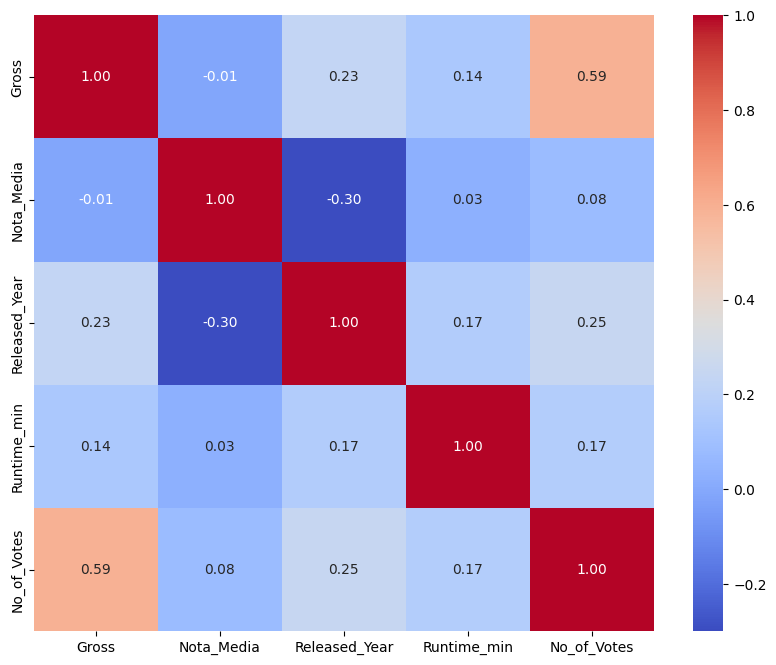

In [195]:
# Visualizando o heatmap agora com a coluna 'Gross' e 'Nota_Media'
colunas_selecionadas = ['Gross', 'Nota_Media', 'Released_Year', 'Runtime_min', 'No_of_Votes']
dados_selecionados = dados_tratados[colunas_selecionadas]
correlacao_selecionados = dados_selecionados.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlacao_selecionados, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Podemos visualizar no heatmap que os principais fatores que tem maior correlação a arrecadação 'Gross' são:

Número de votos: 0.59

Ano de Lançamento: 0.23

Tempo de duração: 0.14

Com as informações observadas no mapa de correlação, podemos tirar alguns insights como o 'Número de Votos' indica a popularidade do filme, quanto maior a quantidade de votos, maior o público que assistiu e avaliou o filme. Logo a arrecadação 'Gross' cresce no mesmo sentido que o número de votos, quanto maior a popularidade do filme, maior o faturamento.

O 'Ano de Lançamento' apesar do coeficiente baixo, ainda é o segundo fator que influencia no faturamento, seu coeficiente positivo pode indicar que filmes mais recentes tendem a faturar mais.

O 'Tempo de Duração' apesar de ainda menor que o 'Ano de Lançamento' é ainda um coeficiente positivo, o que pode indicar que um filme mais curto não necessariamente tem um faturamento maior.

O último insight sobre o único coeficiente negativo a 'Nota Média' nos faz pensar que a nota do filme não é decisiva para o faturamento.



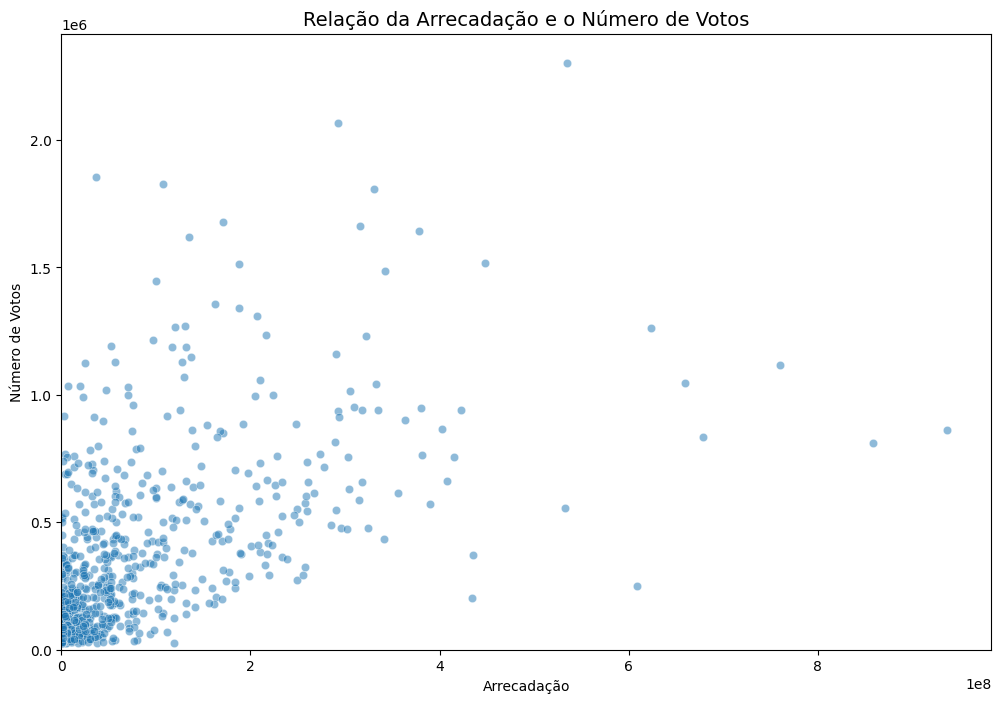

In [167]:
# Criando um gráfico de dispersão da relação da Arrecadação e o Número de Votos
plt.figure(figsize=(12,8))
sns.scatterplot(data=dados_tratados, x='Gross', y='No_of_Votes', alpha=0.5)
plt.title('Relação da Arrecadação e o Número de Votos', fontsize=14)
plt.xlabel('Arrecadação')
plt.ylabel('Número de Votos')
plt.xlim(0, None)
plt.ylim(0, None)

plt.show()

A relação positiva entre Arrecadação 'Gross' e 'Numero de Votos' pode ser visualizada de forma clara nesse gráfico de dispersão. Observa-se uma linha crescente onde mostra a tendencia de quando maior o número de votos, maior a arrecadação. Observa-se também pontos onde isso não é verdade, o que pode indicar presença de outliers.

In [168]:
# Dividindo os filmes em faixas de preços para melhor visualização
bins=[0, 100000, 500000, 2000000, 20000000, 50000000, 100000000, dados_tratados['Gross'].max()]

dados_tratados['Gross_group'] = pd.cut(
    dados_tratados['Gross'],
    bins=bins,
    labels=['1k-100k', '100k-500k', '500k-2M', '2M-20M', '20M-50M', '50M-100M', '>100M']
)

print(dados_tratados['Gross_group'].value_counts())


Gross_group
2M-20M       226
>100M        187
20M-50M      139
50M-100M     110
500k-2M       84
100k-500k     48
1k-100k       36
Name: count, dtype: int64


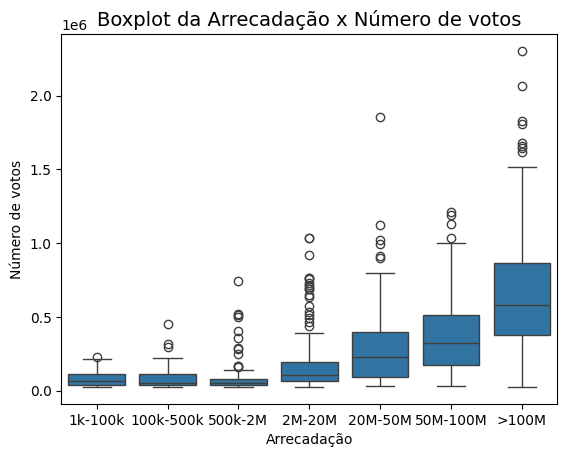

In [205]:
# Visualizando o Boxplot da Arrecadação x Número de Votos
sns.boxplot(data=dados_tratados, x='Gross_group', y='No_of_Votes')
plt.xlabel('Arrecadação')
plt.ylabel('Número de votos')
plt.title('Boxplot da Arrecadação x Número de votos', fontsize=14)
plt.show()

Podemos observar no boxplot que a tendencia é de que quanto maior a Arrecadação, maior é o número de votos, assim como vimos no mapa de correlação, quando um cresce o outro tende a crescer também.

Notamos também a presença de alguns outliers positivos em todas as faixas de valores arrecadados, o que pode indicar a popularidade de alguns filmes com Arrecadação menor.

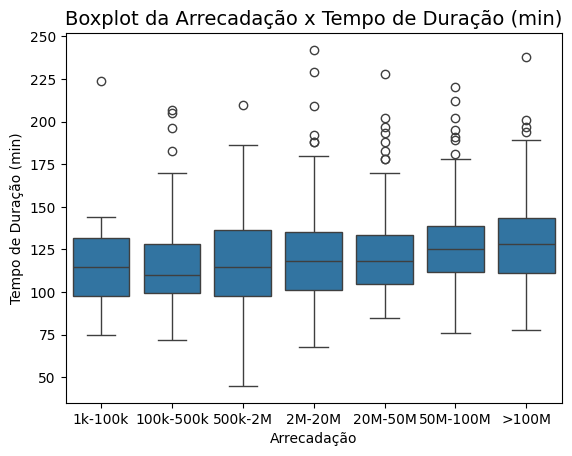

In [207]:
# Visualizando o Boxplot da Arrecadação x Tempo de Duração
sns.boxplot(data=dados_tratados, x='Gross_group', y='Runtime_min')
plt.xlabel('Arrecadação')
plt.ylabel('Tempo de Duração (min)')
plt.title('Boxplot da Arrecadação x Tempo de Duração (min)', fontsize=14)
plt.show()

Podemos observar através do gráfico Boxplot acima que apesar do leve crescimento no tempo de duração a medida que o valor de Arrecadação aumenta, a mediana em todas as faixas sem mantem em um valor próximo. Além da presença de outliers positivos em todos as faixas de arrecadação.

Podemos concluir que apesar do Tempo de Duração ter uma certa influencia na arrecadação, ela não é uma variável decisiva no faturamento.

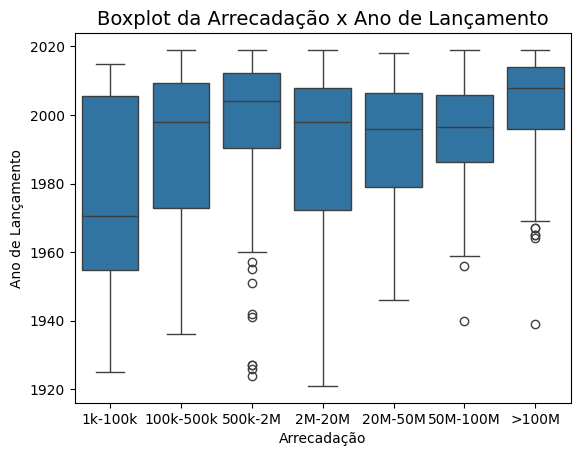

In [208]:
# Visualizando o Boxplot da Arrecadação x Ano de Lançamento
sns.boxplot(data=dados_tratados, x='Gross_group', y='Released_Year')
plt.xlabel('Arrecadação')
plt.ylabel('Ano de Lançamento')
plt.title('Boxplot da Arrecadação x Ano de Lançamento', fontsize=14)
plt.show()

Podemos visualizar no gráfico Boxplot acima que a maior mediana do Ano de Lançamento se encontra na maior faixa de Arrecadação, sinalizando que filmes mais recentes podem ter um faturamento maior. Porém, existe também a presença de outliers negativos indicando que há filmes mais antigos também nessa faixa de Arrecadação.

# Quais insights podem ser tirados com a coluna overview? É possível inferir o gênero do filme a partir dessa coluna?

In [187]:
# Visualizando a coluna 'Overview' garantindo que o texto seja exibido por completo em cada linha
pd.set_option('display.max_colwidth', None)
print(dados_tratados['Overview'].head())

0                                                                                   an organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.
1    when the menace known as the joker wreaks havoc and chaos on the people of gotham, batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.
2                             the early life and career of vito corleone in 1920s new york city is portrayed, while his son, michael, expands and tightens his grip on the family crime syndicate.
3                                                                                a jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence.
4                                               gandalf and aragorn lead the world of men against sauron's army to draw his gaze from frodo and sam as they approach mount doom with the one ring.
Name: Overview, dtype: ob

Podemos observar que na coluna 'Overview' temos textos longos, porém algumas palavras como "crime" ou "fight" se destacam por nos dar dicas de qual gênero estão se referindo. Isso nos dá uma ideia de que se filtrarmos essas palavras, poderemos sim identificar o gênero através da coluna 'Overview'. Para isso, a seguir iremos isolar cada palavra em um novo dataframe para fazer a contagem, além de filtrar as palavras mais frequentes em todos os gêneros que não tem sentido semântico para nos ajudar a identificar o gênero.

In [177]:
# Criando uma nova coluna chamada 'Overview_words' para ser explodida em linhas com palavras únicas garantindo novamente a padronização das palavras em lowercase e retirando os espaçamentos
dados_genero['Overview_words'] = dados_genero['Overview'].str.lower().str.split()

In [178]:
# Explodindo a coluna 'Overview_words' em um novo df para fazermos a contagem das palavras
dados_genero_explodido = dados_genero.explode('Overview_words')

In [179]:
# Fazendo a contagem de palavras por gênero
contagem_palavras = dados_genero_explodido.groupby('Genre_split')['Overview_words'].value_counts().reset_index(name='Count')
print(contagem_palavras)

      Genre_split Overview_words  Count
0          action              a    315
1          action            the    271
2          action             to    180
3          action             of    150
4          action            and    140
...           ...            ...    ...
26402     western          winds      1
26403     western         wolves      1
26404     western           work      1
26405     western        working      1
26406     western          years      1

[26407 rows x 3 columns]


In [283]:
# Criando uma visualização de lista das palavras com mais frequencia para usar como filto stop_words utilizando um parâmetro das 35 primeiras palavras que mais aparecem e verificando se faz sentido esse número ou se aumento o range
stop_words = contagem_palavras['Overview_words'].head(35).to_list()
print(stop_words)

['a', 'the', 'to', 'of', 'and', 'in', 'his', 'an', 'is', 'from', 'by', 'with', 'who', 'he', 'on', 'for', 'as', 'after', 'must', 'when', 'their', 'two', 'young', 'are', 'her', 'against', 'at', 'while', 'one', 'into', 'that', 'find', 'former', 'man', 'up']


In [285]:
# Criando um conjunto de palavras sem valor semântico que aparecem com mais frequencia em todos os textos para filtrar na lista a ser criada
dados_genero_explodido = dados_genero_explodido[~dados_genero_explodido.isin(stop_words)]

In [181]:
# Verificando os gêneros únicos existentes
dados_genero['Genre_split'].unique()

array(['crime', 'drama', 'action', 'adventure', 'biography', 'history',
       'sci-fi', 'romance', 'western', 'fantasy', 'comedy', 'thriller',
       'animation', 'family', 'war', 'mystery', 'music', 'horror',
       'musical', 'film-noir', 'sport'], dtype=object)

In [291]:
# Contar as palavras por gênero
genero_top_words = (dados_genero_explodido.groupby('Genre_split')['Overview_words'].value_counts().groupby(level=0).head(30))
print(genero_top_words)

Genre_split  Overview_words
action       that              14
             find              13
             former            12
             man               12
             up                12
                               ..
western      rescue             2
             track              2
             war                2
             "schofield         1
             "traditional"      1
Name: count, Length: 630, dtype: int64


In [292]:
# Criando um dicionário com a lista de palavras que aparecem mais em cada gênero
genero_words_dict = (genero_top_words.groupby(level=0).apply(lambda x: x.index.get_level_values(1).tolist()).to_dict())


In [294]:
# Exemplo de saíde das listas criadas com o dicionário separada por gênero
print('crime:', genero_words_dict['crime'])
print('drama:', genero_words_dict['drama'])
print('action:', genero_words_dict['action'])
print('adventure:', genero_words_dict['adventure'])

crime: ['man', 'that', 'police', 'they', 'but', 'out', 'up', 'crime', 'has', 'him', 'murder', 'story', 'them', 'finds', 'three', 'family', 'men', 'violent', 'be', 'down', 'former', 'get', 'himself', 'new', 'agent', 'life', 'other', 'tries', 'becomes', 'detective']
drama: ['man', 'that', 'life', 'but', 'they', 'story', 'world', 'new', 'war', 'during', 'has', 'woman', 'love', 'find', 'finds', 'him', 'be', 'out', 'up', 'family', 'between', 'becomes', 'former', 'help', 'lives', 'she', 'each', 'them', 'boy', 'girl']
action: ['that', 'find', 'former', 'man', 'up', 'becomes', 'between', 'out', 'save', 'them', 'war', 'new', 'family', 'help', 'leads', 'police', 'team', 'world', 'agent', 'army', 'battle', 'being', 'but', 'down', 'during', 'officer', 'stop', 'story', 'they', 'together']
adventure: ['world', 'that', 'new', 'find', 'out', 'war', 'help', 'family', 'girl', 'journey', 'save', 'where', 'be', 'boy', 'friends', 'group', 'him', 'man', 'search', 'story', 'up', 'american', 'but', 'mission',

Agora nós já temos nossa lista de palavras mais utilizadas para descrever cada filme, assim podemos através da coluna 'Overview' inferir o gênero do filme.